In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pathlib
import pickle
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gensim-embeddings-dataset/crawl-300d-2M.gensim
/kaggle/input/gensim-embeddings-dataset/GoogleNews-vectors-negative300.gensim
/kaggle/input/gensim-embeddings-dataset/paragram_300_sl999.gensim.vectors.npy
/kaggle/input/gensim-embeddings-dataset/glove.twitter.27B.200d.gensim
/kaggle/input/gensim-embeddings-dataset/numberbatch-en.gensim.vectors.npy
/kaggle/input/gensim-embeddings-dataset/glove.840B.300d.gensim
/kaggle/input/gensim-embeddings-dataset/crawl-300d-2M.gensim.vectors.npy
/kaggle/input/gensim-embeddings-dataset/glove.twitter.27B.200d.gensim.vectors.npy
/kaggle/input/gensim-embeddings-dataset/numberbatch-en.gensim
/kaggle/input/gensim-embeddings-dataset/glove.840B.300d.gensim.vectors.npy
/kaggle/input/gensim-embeddings-dataset/paragram_300_sl999.gensim
/kaggle/input/gensim-embeddings-dataset/GoogleNews-vectors-negative300.gensim.vectors.npy
/kaggle/input/firefox-bug-reports-up-to-042021/output.csv
/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B

In [2]:
from tqdm.notebook import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
df = pd.read_csv("/kaggle/input/firefox-bug-reports-up-to-042021/output.csv")

In [4]:
df.shape

(190763, 21)

In [5]:
df.columns

Index(['id', 'summary', 'status', 'resolution', 'description', 'dupe_of',
       'creator_id', 'creator_real_name', 'creator_name', 'creator_email',
       'creator_nick', 'op_sys', 'platform', 'priority', 'component',
       'severity', 'creation_time', 'last_change_time', 'keywords',
       'resolution.1', 'is_open'],
      dtype='object')

In [6]:
df = df.drop(["creator_id", "creator_real_name", "creator_name", "creator_email", "creator_nick"], axis=1)

In [7]:
df.head()

,id,summary,status,resolution,description,dupe_of,op_sys,platform,priority,component,severity,creation_time,last_change_time,keywords,resolution.1,is_open
0,10954,Dialup properties needs to be exposed in prefs,RESOLVED,WONTFIX,The dialup properties of the profile should be...,NaN,All,All,P3,Preferences,normal,1999-07-30T22:55:51Z,2008-05-14T18:44:15Z,[],WONTFIX,False
1,14871,[Find] Find whole word only,RESOLVED,DUPLICATE,"Please add ""Match Whole Word Only"" option to b...",269442.0,All,All,--,General,minor,1999-09-24T21:49:34Z,2017-01-28T19:55:08Z,['helpwanted'],DUPLICATE,False
2,19118,Plug-In Manager (ui for choosing mimetype-plug...,RESOLVED,WONTFIX,I would really like a plug-in manager for my b...,NaN,All,All,--,Preferences,normal,1999-11-17T22:58:26Z,2018-03-05T20:10:55Z,[],WONTFIX,False
3,21482,Improvement to Save File dialog: folder based ...,NEW,NaN,Perhaps this really should be in the standardi...,NaN,All,All,P3,File Handling,normal,1999-12-11T04:13:35Z,2019-01-03T17:33:57Z,[],NaN,True
4,23207,"Options in Save As (location of saved images, ...",NEW,NaN,Save as... feature should be extended in follo...,NaN,Unspecified,Unspecified,P5,File Handling,normal,2000-01-06T03:19:51Z,2020-12-11T16:34:00Z,[],NaN,True


In [8]:
df.columns

Index(['id', 'summary', 'status', 'resolution', 'description', 'dupe_of',
       'op_sys', 'platform', 'priority', 'component', 'severity',
       'creation_time', 'last_change_time', 'keywords', 'resolution.1',
       'is_open'],
      dtype='object')

In [9]:
df["status"].value_counts()

RESOLVED       147071
VERIFIED        25481
NEW             13025
UNCONFIRMED      4275
REOPENED          616
ASSIGNED          295
Name: status, dtype: int64

In [10]:
df["is_open"].value_counts()

False    172552
True      18211
Name: is_open, dtype: int64

In [11]:
df["severity"].value_counts()

normal         142231
major           15261
critical        11728
minor            8571
--               4598
trivial          3500
S3               1724
S4               1494
blocker           525
S2                277
enhancement        45
S1                 32
Name: severity, dtype: int64

In [12]:
df.groupby('severity')["creation_time"].max().sort_values()

severity
trivial        2019-06-20T17:23:33Z
enhancement    2019-12-05T19:58:46Z
blocker        2020-04-27T15:10:11Z
critical       2020-04-28T15:47:34Z
minor          2020-11-16T15:52:48Z
major          2021-04-07T18:58:18Z
S3             2021-04-16T11:39:07Z
normal         2021-04-16T16:36:27Z
S4             2021-04-16T19:42:42Z
S2             2021-04-17T02:42:52Z
S1             2021-04-18T03:10:06Z
--             2021-04-18T10:36:19Z
Name: creation_time, dtype: object

In [13]:
df["keywords"].nunique()

1680

In [14]:
df["resolution"].value_counts()

DUPLICATE     46988
FIXED         37931
WORKSFORME    26908
INCOMPLETE    25539
INVALID       23438
WONTFIX        8597
EXPIRED        2127
INACTIVE        980
MOVED            44
Name: resolution, dtype: int64

In [15]:
df["component"].nunique()

52

In [16]:
counts = df["component"].value_counts()
counts

General                                 64153
Untriaged                               18207
Bookmarks & History                     13972
Tabbed Browser                           9786
Address Bar                              8120
Preferences                              6882
Toolbars and Customization               6701
Theme                                    6442
Sync                                     5930
Menus                                    4440
Session Restore                          4205
Search                                   4171
New Tab Page                             4132
File Handling                            3471
Extension Compatibility                  3371
Security                                 3277
Shell Integration                        2610
Installer                                2504
PDF Viewer                               2193
Keyboard Navigation                      1808
Messaging System                         1561
Private Browsing                  

In [17]:
components_to_remove = []

In [18]:
df[df["component"] == "Activity Streams: Server Operations"]

,id,summary,status,resolution,description,dupe_of,op_sys,platform,priority,component,severity,creation_time,last_change_time,keywords,resolution.1,is_open
148543,1328701,Deploy Onyx 1.4.21 to prod,VERIFIED,FIXED,NaN,NaN,Unspecified,Unspecified,--,Activity Streams: Server Operations,normal,2017-01-04T20:49:22Z,2017-01-05T14:18:37Z,[],FIXED,False
149300,1338315,Deploy Infernyx 0.1.62 to Stage,RESOLVED,FIXED,NaN,NaN,Unspecified,Unspecified,--,Activity Streams: Server Operations,normal,2017-02-09T21:25:22Z,2017-02-13T16:03:57Z,[],FIXED,False
149934,1346878,Deploy Infernyx 0.1.69 to stage,RESOLVED,FIXED,NaN,NaN,Unspecified,Unspecified,--,Activity Streams: Server Operations,normal,2017-03-13T17:43:02Z,2017-03-13T18:39:40Z,[],FIXED,False
150056,1348370,Deploy Splice 2.1.26 to prod,RESOLVED,FIXED,Please refers to the stage deploy of 2.1.26 fo...,NaN,Unspecified,Unspecified,--,Activity Streams: Server Operations,normal,2017-03-17T18:21:04Z,2017-03-20T15:47:45Z,[],FIXED,False
150057,1348371,Deploy Infernyx 0.1.70 to prod,RESOLVED,FIXED,NaN,NaN,Unspecified,Unspecified,--,Activity Streams: Server Operations,normal,2017-03-17T18:22:07Z,2017-03-20T15:57:51Z,[],FIXED,False


It seems "Activity Streams: Server Operations" is a short term component in the past and can be removed from current consideration. Will do it later.

In [19]:
df[df["component"] == "System Add-ons: Off-train Deployment"].tail()[["creation_time", "description"]]

,creation_time,description
176124,2019-09-04T22:27:05Z,"We have 6.0.0 shipping via Release, and it see..."
176641,2019-09-23T17:36:16Z,"We have 6.0.3 shipping now, but need to ship 6..."
177114,2019-10-08T19:35:42Z,We would like a new version to ridealong in a ...
188859,2021-03-02T19:41:15Z,+++ This bug was initially created as a clone ...
189556,2021-03-23T13:58:13Z,+++ This bug was initially created as a clone ...


In [20]:
df.iloc[189556].description

'+++ This bug was initially created as a clone of Bug #1696002 +++\n\n+++ This bug was initially created as a clone of Bug #1681486 +++\n\nRepo is here: https://github.com/mozilla-extensions/restore-search-defaults\n\nShipping an update to bump version compatibility and expand to 87 release.'

"System Add-ons: Off-train Deployment" above seems to be focused on 2019, with a few "clone" type issues recently. I would just remove it for now, so lets do it:

In [21]:
components_to_remove.append("System Add-ons: Off-train Deployment")

In [22]:
df["creation_date"] = pd.to_datetime(df['creation_time'])


In [23]:
df_webui = df[df["component"]=="WebPayments UI"]

<AxesSubplot:xlabel='creation_date,creation_date'>

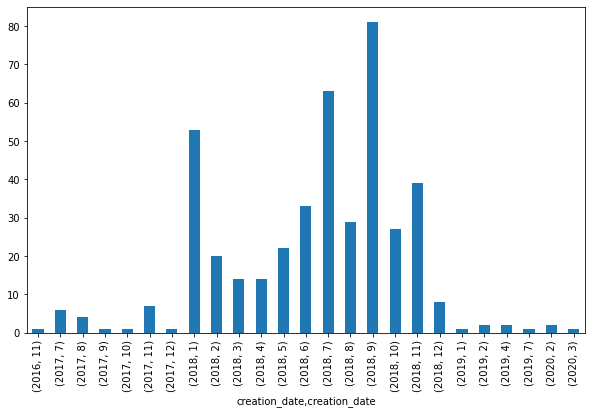

In [24]:
#https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates
df_webui["creation_date"].groupby([df_webui["creation_date"].dt.year, df_webui["creation_date"].dt.month]).count().plot(kind="bar", figsize=(10,6))

In [25]:
df_webui[(df_webui["creation_date"].dt.year == 2018) & (df_webui["creation_date"].dt.month==8)]

,id,summary,status,resolution,description,dupe_of,op_sys,platform,priority,component,severity,creation_time,last_change_time,keywords,resolution.1,is_open,creation_date
165230,1479958,Intermittent browser/components/payments/test/...,RESOLVED,INCOMPLETE,Filed by: btara [at] mozilla.com\n\nhttps://tr...,NaN,Unspecified,Unspecified,P5,WebPayments UI,normal,2018-08-01T00:25:11Z,2018-11-30T23:50:43Z,['intermittent-failure'],INCOMPLETE,False,2018-08-01 00:25:11+00:00
165231,1479959,Intermittent browser/components/payments/test/...,RESOLVED,DUPLICATE,Filed by: btara [at] mozilla.com\n\nhttps://tr...,1479958.0,Unspecified,Unspecified,P5,WebPayments UI,normal,2018-08-01T00:25:14Z,2018-08-02T13:37:49Z,['intermittent-failure'],DUPLICATE,False,2018-08-01 00:25:14+00:00
165235,1480023,The “Save” button is grayed out after editing ...,VERIFIED,FIXED,[Affected versions]:\nNightly 63.0a1\n\n[Affec...,NaN,All,All,P1,WebPayments UI,normal,2018-08-01T08:49:28Z,2018-08-06T08:46:24Z,[],FIXED,False,2018-08-01 08:49:28+00:00
165260,1480394,Intermittent browser/components/payments/test/...,RESOLVED,INCOMPLETE,Filed by: csabou [at] mozilla.com\n\nhttps://t...,NaN,Unspecified,Unspecified,P5,WebPayments UI,normal,2018-08-02T12:08:56Z,2018-09-11T20:48:38Z,['intermittent-failure'],INCOMPLETE,False,2018-08-02 12:08:56+00:00
165294,1480707,Payment failure string does not respect spec.,RESOLVED,DUPLICATE,[Affected versions]:\nNightly 63.0a1\n\n[Affec...,1470207.0,All,All,--,WebPayments UI,normal,2018-08-03T09:51:30Z,2018-08-03T14:38:32Z,[],DUPLICATE,False,2018-08-03 09:51:30+00:00
165297,1480717,Credit card form billing address validation an...,VERIFIED,FIXED,[Affected versions]:\nNightly 63.0a1\n\n[Affec...,NaN,All,All,P1,WebPayments UI,normal,2018-08-03T10:22:53Z,2020-04-03T13:26:35Z,[],FIXED,False,2018-08-03 10:22:53+00:00
165298,1480719,Credit card form can be saved without expirati...,VERIFIED,FIXED,[Affected versions]:\nNightly 63.0a1\n\n[Affec...,NaN,All,All,P1,WebPayments UI,normal,2018-08-03T10:31:19Z,2018-09-03T11:16:14Z,[],FIXED,False,2018-08-03 10:31:19+00:00
165315,1480880,Changing defaults preferences does not update ...,VERIFIED,FIXED,This is a follow-up from bug 1477106. Although...,NaN,Unspecified,Unspecified,P1,WebPayments UI,normal,2018-08-03T20:05:25Z,2018-08-10T08:39:46Z,[],FIXED,False,2018-08-03 20:05:25+00:00
165317,1480886,Position the form fields for the address-form ...,VERIFIED,FIXED,The current layout of the form fields is a bit...,NaN,Unspecified,Unspecified,P1,WebPayments UI,normal,2018-08-03T20:25:51Z,2018-09-05T07:40:53Z,[],FIXED,False,2018-08-03 20:25:51+00:00
165353,1481243,The generic merchant error messages have incor...,NEW,NaN,[Affected versions]:\nNightly 63.0a1\n\n[Affec...,NaN,All,All,P3,WebPayments UI,normal,2018-08-06T15:27:08Z,2018-11-15T19:01:55Z,[],NaN,True,2018-08-06 15:27:08+00:00


In [26]:
#df[df["component"] == "Activity Streams: Timeline"]

Much like the previous Activity Streams component, "Activity Streams: Timeline" also seems to have been a short-time component in 2016. It does not seem likely that new issues would be relevant to it. Which gives me an idea that maybe it would be useful to check what other components could be removed based on inactivity: 

In [27]:
df.groupby('component')["creation_time"].min().sort_values()

component
Preferences                             1999-07-30T22:55:51Z
General                                 1999-09-24T21:49:34Z
File Handling                           1999-12-11T04:13:35Z
Tabbed Browser                          2000-05-10T18:05:00Z
Shell Integration                       2000-07-25T18:34:28Z
Keyboard Navigation                     2000-09-15T18:44:03Z
Bookmarks & History                     2001-02-26T09:49:58Z
Untriaged                               2002-02-18T13:04:22Z
Menus                                   2002-02-22T15:15:47Z
Site Identity                           2002-03-14T18:20:17Z
Address Bar                             2002-03-23T23:18:52Z
Page Info Window                        2002-04-25T19:15:00Z
Security                                2002-06-06T09:10:24Z
Toolbars and Customization              2002-06-09T13:09:02Z
Search                                  2002-06-20T19:51:06Z
Theme                                   2002-07-15T15:40:03Z
Installer     

OK, so there are the 3 activity streams components that can be removed it seems. Lets to that:

In [28]:
components_to_remove.extend(["Activity Streams: General", "Activity Streams: Server Operations", "Activity Streams: Timeline"])

In [29]:
components_to_remove

['System Add-ons: Off-train Deployment',
 'Activity Streams: General',
 'Activity Streams: Server Operations',
 'Activity Streams: Timeline']

In [30]:
df.groupby('component')["creation_time"].min().sort_values()

component
Preferences                             1999-07-30T22:55:51Z
General                                 1999-09-24T21:49:34Z
File Handling                           1999-12-11T04:13:35Z
Tabbed Browser                          2000-05-10T18:05:00Z
Shell Integration                       2000-07-25T18:34:28Z
Keyboard Navigation                     2000-09-15T18:44:03Z
Bookmarks & History                     2001-02-26T09:49:58Z
Untriaged                               2002-02-18T13:04:22Z
Menus                                   2002-02-22T15:15:47Z
Site Identity                           2002-03-14T18:20:17Z
Address Bar                             2002-03-23T23:18:52Z
Page Info Window                        2002-04-25T19:15:00Z
Security                                2002-06-06T09:10:24Z
Toolbars and Customization              2002-06-09T13:09:02Z
Search                                  2002-06-20T19:51:06Z
Theme                                   2002-07-15T15:40:03Z
Installer     

In [31]:
df[(df["component"] == "Untriaged") & (df["is_open"] == True)].head()[["id", "status", "summary", "creation_time"]]

,id,status,summary,creation_time
136,126173,NEW,"correct abbreviation of second is ""s"" not ""sec...",2002-02-18T13:04:22Z
178693,1601394,UNCONFIRMED,FF 70.0.1 buggy and can not load various sites,2019-12-04T19:12:59Z
184247,1654023,NEW,Data collection approval for DNSSEC stud.,2020-07-20T16:36:03Z
185680,1667941,NEW,Alt-2 to Alt-7 not working after updating to F...,2020-09-29T08:19:37Z
186127,1672396,UNCONFIRMED,"Dice links not found, (error 404)",2020-10-21T13:54:00Z


In [32]:
df.columns

Index(['id', 'summary', 'status', 'resolution', 'description', 'dupe_of',
       'op_sys', 'platform', 'priority', 'component', 'severity',
       'creation_time', 'last_change_time', 'keywords', 'resolution.1',
       'is_open', 'creation_date'],
      dtype='object')

In [33]:
#df[df["component"] == "Foxfooding"]

In [34]:
#df[df["component"] == "Distributions"]

Distribution seems to have a few issues but consistently over the years. So I will leave the rest in place, although I guess with better product knowledge, one could make more informed choices still.

In [35]:
df.shape

(190763, 17)

In [36]:
df["description"].isnull().sum()

2973

In [37]:
#df.dropna(subset=['description'], inplace=True)

In [38]:
df["summary"].isnull().sum()

4

In [39]:
df[df["summary"].isnull()]["description"]


13832    User-Agent:       Mozilla/5.0 (X11; U; Linux i...
92653    User-Agent:       Mozilla/5.0 (Windows; U; Win...
92875    User-Agent:       Mozilla/4.0 (compatible; MSI...
94106    User-Agent:       Mozilla/5.0 (Windows; U; Win...
Name: description, dtype: object

In [40]:
df.iloc[13832]["description"]

'User-Agent:       Mozilla/5.0 (X11; U; Linux i686; rv:1.7.3) Gecko/20041001 Firefox/0.10.1\nBuild Identifier: Mozilla/5.0 (X11; U; Linux i686; rv:1.7.3) Gecko/20041001 Firefox/0.10.1\n\nIt will be good to have "Use proxy only for the sites listed...."  in\n"Connection settiongs"->Proxy configuration.\n(See Konqueror)\n\nReproducible: Always\nSteps to Reproduce:\n1.\n2.\n3.'

In [41]:
#now we remove some of the common template texts shown above

import re

counter = 0

def slice_row(row):
    global counter
    if pd.isnull(row):
        return row
#    if counter > 10:
#        return row
    counter += 1
    
    #start = row.find("User-Agent:")
    start = re.search(r'User.Agent:', row)
    if start is None:
        return row
    start = start.start()
    while start >= 0:
        end = row.find("\n", start)
#        print(f"----------- {counter} -------------")
#        print(f"removing ua: {start} - {end}")
#        print(row)
        if end < 0:
            end = len(row)
        if end == 0:
            break
        row_start = row[:start]
        row_end = row[end:]
        row = row_start+" "+row_end
        #print(row)
        #start = row.find("User-Agent:", start)
        start = re.search(r'User.Agent:', row)
        if start is None:
            break
        start = start.start()
        
    start = row.find("Build Identifier:")
#    start = re.search(r'User.Agent:', row).start()
    #print("b")
    while start >= 0:
        end = row.find("\n", start)
        if end < 0:
            end = len(row)
        if end == 0:
            break
        row_start = row[:start]
        row_end = row[end:]
        row = row_start+" "+row_end
        start = row.find("Build Identifier:")
    #print("c")
    return row
        
df["description"] = df["description"].progress_apply(slice_row)#.str.startswith("User-Agent:").sum()
df["summary"] = df["summary"].progress_apply(slice_row)#.str.startswith("User-Agent:").sum()


  0%|          | 0/190763 [00:00<?, ?it/s]

  0%|          | 0/190763 [00:00<?, ?it/s]

In [42]:
df['text_feature'] = df[["summary", "description"]].apply(
    lambda row: '\n'.join(row.values.astype(str)), axis=1)

In [43]:
df["text_feature"].isnull().sum()

0

In [44]:
df.iloc[190762]["description"]

' \n\nSteps to reproduce:\n\nWhen I click on the star to the right of the URL bar to add a bookmark, the menu that shows up is cut off at the bottom.\n\nBecause of this, I cannot confirm my action or delete the bookmark.\n\nThis only happens with GTK fractional scaling (125% in my case), at 100% everything looks and behaves fine.\n\nMy system:\nFedora Linux 34 Workstation (beta)\nGNOME 40.0\nGTK 4.2\nFirefox 87.0\n\n\nActual results:\n\nThe bookmark menu is cut off at the bottom.\n\n\nExpected results:\n\nThe bookmark menu and its options should be fully visible.'

In [45]:
df.iloc[190762]["text_feature"]

'Menu when adding bookmark is cut off with GTK fractional scaling\n \n\nSteps to reproduce:\n\nWhen I click on the star to the right of the URL bar to add a bookmark, the menu that shows up is cut off at the bottom.\n\nBecause of this, I cannot confirm my action or delete the bookmark.\n\nThis only happens with GTK fractional scaling (125% in my case), at 100% everything looks and behaves fine.\n\nMy system:\nFedora Linux 34 Workstation (beta)\nGNOME 40.0\nGTK 4.2\nFirefox 87.0\n\n\nActual results:\n\nThe bookmark menu is cut off at the bottom.\n\n\nExpected results:\n\nThe bookmark menu and its options should be fully visible.'

In [46]:
df["text_feature"].tail()

190758    Reduce memory usage by unloading ReaderWorker....
190759    Make Zoom-Button scrollable\n \n\n\n\n\nExpect...
190760    Add Clear Button to Findbar\n \n\n\n\n\nExpect...
190761    POST searches do not work with drag-and-drop t...
190762    Menu when adding bookmark is cut off with GTK ...
Name: text_feature, dtype: object

In [47]:
df.iloc[0]

id                                                              10954
summary                Dialup properties needs to be exposed in prefs
status                                                       RESOLVED
resolution                                                    WONTFIX
description         The dialup properties of the profile should be...
dupe_of                                                           NaN
op_sys                                                            All
platform                                                          All
priority                                                           P3
component                                                 Preferences
severity                                                       normal
creation_time                                    1999-07-30T22:55:51Z
last_change_time                                 2008-05-14T18:44:15Z
keywords                                                           []
resolution.1        

In [48]:
df.iloc[0]["text_feature"]

"Dialup properties needs to be exposed in prefs\nThe dialup properties of the profile should be exposed in the prefs panels so\nthe user has an easy way to modify them.  The only other alternative would be to\nmake people go to the profile manager to edit them, but we don't have that in\nplace either.  Let's try the prefs panel approach first."

In [49]:
df["text_feature"].isnull().sum()

0

In [50]:
df[df["summary"].isnull()]["description"]

13832     \n \n\nIt will be good to have "Use proxy onl...
92653     \n \n\nna\n\nReproducible: Always\n\nSteps to...
92875     \n \n\nDear Mozilla, We recently launched our...
94106                    \n \n\nNA\n\nReproducible: Always
Name: description, dtype: object

In [51]:
components_to_remove.append("Untriaged")

In [52]:
for comp in components_to_remove:
    print(f"dropping rows for component {comp}")
    df = df[df["component"] != comp]

dropping rows for component System Add-ons: Off-train Deployment
dropping rows for component Activity Streams: General
dropping rows for component Activity Streams: Server Operations
dropping rows for component Activity Streams: Timeline
dropping rows for component Untriaged


In [53]:
df.shape

(172398, 18)

In [54]:
df["component"].value_counts()

General                       64153
Bookmarks & History           13972
Tabbed Browser                 9786
Address Bar                    8120
Preferences                    6882
Toolbars and Customization     6701
Theme                          6442
Sync                           5930
Menus                          4440
Session Restore                4205
Search                         4171
New Tab Page                   4132
File Handling                  3471
Extension Compatibility        3371
Security                       3277
Shell Integration              2610
Installer                      2504
PDF Viewer                     2193
Keyboard Navigation            1808
Messaging System               1561
Private Browsing               1494
Downloads Panel                1264
Disability Access               998
Protections UI                  984
Migration                       964
Site Identity                   809
Page Info Window                731
about:logins                

In [55]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers so they work as targets for the prediction algorithm
encoder = LabelEncoder()
encoder.fit(df["component"])

LabelEncoder()

In [56]:
df["component"].isnull().sum()

0

In [57]:
df["comp_label"] = encoder.transform(df["component"])

In [58]:
encoder.classes_

array(['Address Bar', 'Bookmarks & History', 'Disability Access',
       'Distributions', 'Downloads Panel', 'Enterprise Policies',
       'Extension Compatibility', 'File Handling', 'Firefox Accounts',
       'Firefox Monitor', 'Foxfooding', 'General', 'Headless',
       'Installer', 'Keyboard Navigation', 'Launcher Process', 'Menus',
       'Messaging System', 'Migration', 'New Tab Page',
       'Nimbus Desktop Client', 'Normandy Client', 'Normandy Server',
       'PDF Viewer', 'Page Info Window', 'Pioneer', 'Pocket',
       'Preferences', 'Private Browsing', 'Protections UI',
       'Remote Settings Client', 'Screenshots', 'Search', 'Security',
       'Session Restore', 'Shell Integration', 'Site Identity',
       'Site Permissions', 'Sync', 'Tabbed Browser', 'Theme',
       'Toolbars and Customization', 'Top Sites', 'Tours', 'Translation',
       'WebPayments UI', 'about:logins'], dtype=object)

In [59]:
df["component"].nunique()

47

In [60]:
df["comp_label"].nunique()

47

In [61]:
labels = df["comp_label"]

In [62]:
df.head()

,id,summary,status,resolution,description,dupe_of,op_sys,platform,priority,component,severity,creation_time,last_change_time,keywords,resolution.1,is_open,creation_date,text_feature,comp_label
0,10954,Dialup properties needs to be exposed in prefs,RESOLVED,WONTFIX,The dialup properties of the profile should be...,NaN,All,All,P3,Preferences,normal,1999-07-30T22:55:51Z,2008-05-14T18:44:15Z,[],WONTFIX,False,1999-07-30 22:55:51+00:00,Dialup properties needs to be exposed in prefs...,27
1,14871,[Find] Find whole word only,RESOLVED,DUPLICATE,"Please add ""Match Whole Word Only"" option to b...",269442.0,All,All,--,General,minor,1999-09-24T21:49:34Z,2017-01-28T19:55:08Z,['helpwanted'],DUPLICATE,False,1999-09-24 21:49:34+00:00,"[Find] Find whole word only\nPlease add ""Match...",11
2,19118,Plug-In Manager (ui for choosing mimetype-plug...,RESOLVED,WONTFIX,I would really like a plug-in manager for my b...,NaN,All,All,--,Preferences,normal,1999-11-17T22:58:26Z,2018-03-05T20:10:55Z,[],WONTFIX,False,1999-11-17 22:58:26+00:00,Plug-In Manager (ui for choosing mimetype-plug...,27
3,21482,Improvement to Save File dialog: folder based ...,NEW,NaN,Perhaps this really should be in the standardi...,NaN,All,All,P3,File Handling,normal,1999-12-11T04:13:35Z,2019-01-03T17:33:57Z,[],NaN,True,1999-12-11 04:13:35+00:00,Improvement to Save File dialog: folder based ...,7
4,23207,"Options in Save As (location of saved images, ...",NEW,NaN,Save as... feature should be extended in follo...,NaN,Unspecified,Unspecified,P5,File Handling,normal,2000-01-06T03:19:51Z,2020-12-11T16:34:00Z,[],NaN,True,2000-01-06 03:19:51+00:00,"Options in Save As (location of saved images, ...",7


In [63]:
#features = df["description"]
features = df["text_feature"]

In [64]:
def load_word_vectors(glove_dir):
    print('Indexing word vectors.')

    embeddings_index = {}
    glove_path = os.path.join(glove_dir, 'glove.6B.300d.txt')
    len(list(open(glove_path)))
    with open(glove_path, encoding='utf8') as f:
        for line in tqdm(f, total=400_000):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors.' % len(embeddings_index))
    return embeddings_index

In [65]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def tokenize_text(vocab_size, texts, seq_length):
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    X = pad_sequences(sequences, maxlen=seq_length)
    #to_categorical converst vector of class labels (0 to N ints) to binary matrix
    #see keras docs for more info
#    y = to_categorical(labels)
    print('Shape of data tensor:', X.shape)
#    print('Shape of label tensor:', y.shape)

    return X, tokenizer
    #return data, X, y, tokenizer

In [66]:
def embedding_index_to_matrix(embeddings_index, vocab_size, embedding_dim, word_index):
    print('Preparing embedding matrix.')

    # prepare embedding matrix
    num_words = min(vocab_size, len(word_index))
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= vocab_size:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [67]:
def create_callbacks(name):
#    tensorboard_callback = TensorBoard(log_dir=os.path.join(os.getcwd(), "tb_log_newsgroups", name),
#                                       write_graph=True,
#                                       write_grads=False,
#                                       embeddings_freq=1,
#                                       embeddings_layer_names="embedding")
    checkpoint_callback = ModelCheckpoint(filepath=f"./model-weights-" + name + ".hdf5",
                                          monitor='val_loss', verbose=1, save_best_only=True)
#    return [tensorboard_callback, checkpoint_callback]
    return [checkpoint_callback]

In [68]:
glove_dir = "../input/glove6b"
embeddings_index = load_word_vectors(glove_dir)

Indexing word vectors.


  0%|          | 0/400000 [00:00<?, ?it/s]

Found 400000 word vectors.


In [69]:
vocab_size = 30000
seq_length = 512
X, tokenizer = tokenize_text(vocab_size, features.astype(str), seq_length)

Found 491179 unique tokens.
Shape of data tensor: (172398, 512)


In [70]:
embedding_dim = 300
embedding_matrix = embedding_index_to_matrix(embeddings_index=embeddings_index,
                                                 vocab_size=vocab_size,
                                                 embedding_dim=embedding_dim,
                                                 word_index=tokenizer.word_index)

Preparing embedding matrix.


In [71]:
#had to run half-and-half to keep the runtime within Kaggle limits
#seeds = [10565036, 95525152, 81064673, 8702320, 7213066]
#seeds = [17350873, 75652258, 30526287, 18683835, 11597371]

#for this example, I just do it once to upload to github
seeds = [17350873]


In [72]:
pathlib.Path('datasets').mkdir(parents=True, exist_ok=True)

In [73]:
for seed in tqdm(seeds):
    train_texts, test_texts, train_labels, test_labels = train_test_split(X, labels, test_size=.1, random_state=seed, stratify=labels)
    print(f"train={train_texts.shape}")
    train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2, random_state=seed, stratify=train_labels)
    print(train_texts.shape)
    print(val_texts.shape)
    print(test_texts.shape)
    print(f"train={train_texts.shape}, val={val_texts.shape}, test={test_texts.shape}")
    dataset = {"train_texts": train_texts, "test_texts": test_texts, "val_texts": val_texts,
              "train_labels": train_labels, "test_labels": test_labels, "val_labels": val_labels}
    with open(f'datasets/{seed}.pickle', 'wb') as handle:
        pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)


  0%|          | 0/1 [00:00<?, ?it/s]

train=(155158, 512)
(124126, 512)
(31032, 512)
(17240, 512)
train=(124126, 512), val=(31032, 512), test=(17240, 512)


In [74]:
category_count = labels.nunique()
category_count

47

In [75]:
def show_training_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [76]:
len(list(encoder.classes_))

47

In [77]:
!pip3 install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.49.0-py3-none-any.whl size=19467 sha256=9dc007a6c36980d35c47cf3f2bc12d6d2c50cbdfb78fe711b77f24144c8b2c22
  Stored in directory: /root/.cache/pip/wheels/72/f2/4d/f9a9d35bc8907948afb906414cf4196d8e455bdc9fb94b898e
Successfully built keras-self-attention


In [78]:
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention

In [79]:
from keras.layers import Dense, Input, GlobalMaxPooling1D, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import LSTM#, CuDNNLSTM 

def build_model_lstm_attention(vocab_size, embedding_dim, embedding_matrix, sequence_length, cat_count, embeddings_trainable):
    input = Input(shape=(sequence_length,), name="Input")
    if embedding_matrix is None:
        embedding = Embedding(input_dim=vocab_size, 
                              output_dim=embedding_dim, 
                              input_length=sequence_length,
                              trainable=embeddings_trainable,
                              name="embedding")(input)
    else:
        embedding = Embedding(input_dim=vocab_size, 
                              weights=[embedding_matrix],
                              output_dim=embedding_dim, 
                              input_length=sequence_length,
                              trainable=embeddings_trainable,
                              name="embedding")(input)
    lstm1_bi1 = Bidirectional(LSTM(128, return_sequences=True, name='lstm1'), name="lstm-bi1")(embedding)
#    drop1 = Dropout(0.2, name="drop1")(lstm1_bi1)
    attention1 = SeqSelfAttention(attention_width=attention_width)(lstm1_bi1)
    lstm2_bi2 = Bidirectional(LSTM(64, return_sequences=True, name='lstm2'), name="lstm-bi2")(attention1)
#    drop2 = Dropout(0.1, name="drop2")(lstm2_bi2)
    attention2 = SeqWeightedAttention()(lstm2_bi2)
#    mid_dense = Dense(cat_count, activation='sigmoid', name='mid_dense')(attention2)
#    drop3 = Dropout(0.2, name="drop3")(mid_dense)
    output = Dense(cat_count, activation='sigmoid', name='output')(attention2)
    model = Model(inputs=input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [81]:
attention_width=None

In [82]:
def train_model_attention(seed, embedding_dim, embedding_matrix, X_train, y_train, X_val, y_val, X_test, y_test, embeddings_trainable):
    callbacks = create_callbacks(f"firefox-bugs-{seed}")

    #https://raw.githubusercontent.com/PacktPublishing/Deep-Learning-Quick-Reference/master/Chapter10/newsgroup_classifier_pretrained_word_embeddings.py
    model = build_model_lstm_attention(vocab_size=vocab_size,
                        embedding_dim=embedding_dim,
                        sequence_length=seq_length,
                        embedding_matrix=embedding_matrix,
                        cat_count=category_count,
                        embeddings_trainable=embeddings_trainable) 

    history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              callbacks=callbacks)

    #the callback should have saved the model at best epoch, so just use it
    #model.save("model_with_attention.h5")
    print(f"loading model weights: ./model-weights-firefox-bugs-{seed}.hdf5")
    model.load_weights(f"./model-weights-firefox-bugs-{seed}.hdf5")

    score, acc = model.evaluate(x=X_test,
                                y=y_test,
                                batch_size=batch_size)
    print('Test loss:', score)
    print('Test accuracy:', acc)
    return history, model

running seed: 17350873
Epoch 1/4
2586/2586 [==============================] - 989s 379ms/step - loss: 1.6708 - accuracy: 0.5750 - val_loss: 0.9672 - val_accuracy: 0.7156

Epoch 00001: val_loss improved from inf to 0.96716, saving model to ./model-weights-firefox-bugs-17350873.hdf5
Epoch 2/4
2586/2586 [==============================] - 970s 375ms/step - loss: 0.8354 - accuracy: 0.7478 - val_loss: 0.9067 - val_accuracy: 0.7279

Epoch 00002: val_loss improved from 0.96716 to 0.90668, saving model to ./model-weights-firefox-bugs-17350873.hdf5
Epoch 3/4
2586/2586 [==============================] - 969s 375ms/step - loss: 0.6576 - accuracy: 0.7942 - val_loss: 0.9211 - val_accuracy: 0.7310

Epoch 00003: val_loss did not improve from 0.90668
Epoch 4/4
2586/2586 [==============================] - 959s 371ms/step - loss: 0.4867 - accuracy: 0.8446 - val_loss: 0.9973 - val_accuracy: 0.7242

Epoch 00004: val_loss did not improve from 0.90668
loading model weights: ./model-weights-firefox-bugs-17350

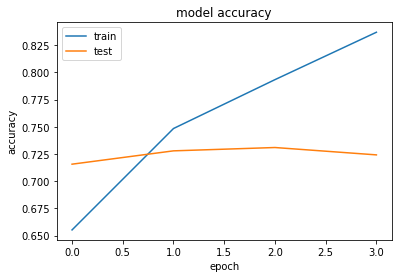

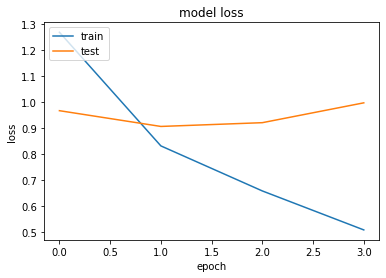

12566
0.7288863109048724
16584
0.9619489559164733


In [84]:
batch_size = 48
epochs = 4

for seed in seeds:
    print(f"running seed: {seed}")
    with open(f'datasets/{seed}.pickle', 'rb') as handle:
        dataset = pickle.load(handle)
    #the slice size is just to train model much faster with less data to test stuff
    #by setting it to higher value than the number of rows it trains on whole data
    slice_size = 10000000
    X_train = dataset["train_texts"][:slice_size]
    X_val = dataset["val_texts"][:slice_size]
    X_test = dataset["test_texts"][:slice_size]
    y_train = dataset["train_labels"][:slice_size]
    y_val = dataset["val_labels"][:slice_size]
    y_test = dataset["test_labels"][:slice_size]
    
    #TODO: maybe try huggingface with categorical encoding?
    y_train = to_categorical(y_train)
    y_val = to_categorical(y_val)
    y_test = to_categorical(y_test)    
    history, model = train_model_attention(seed, embedding_dim, embedding_matrix, X_train, y_train, X_val, y_val, X_test, y_test, True)
    show_training_history(history)

    predictions_proba = model.predict(X_test)

    top1_preds = [x.argmax() for x in predictions_proba]
    y_test_num = np.argmax(y_test, axis=1)
    correct = sum(top1_preds == y_test_num)
    print(correct)
    print(correct/len(y_test))

    n = 5
    top5_preds = [np.flip(x[-n:], 0) for x in np.argsort(predictions_proba)]
    top5_correct = 0
    missed_rows_top5 = []
    for idx, label in enumerate(y_test_num):
        row_top5 = top5_preds[idx]
        if label in row_top5:
            top5_correct += 1
        else:
            missed_rows_top5.append(idx)
    print(top5_correct)
    print(top5_correct/len(y_test))
    break

In [85]:
diff_indices = np.where(top1_preds != y_test_num)
diff_indices

(array([    1,     8,    10, ..., 17231, 17234, 17235]),)

In [86]:
diff_indices[0].shape

(4674,)

In [87]:
mismatched_label_ids = [y_test_num[x] for x in diff_indices[0]]
mismatched_labels_actual = [encoder.classes_[x] for x in mismatched_label_ids]
#mismatched_labels_actual

In [88]:
mismatched_label_ids = [top1_preds[x] for x in diff_indices[0]]
mismatched_labels_pred = [encoder.classes_[x] for x in mismatched_label_ids]
#mismatched_labels_pred

In [89]:
df_fails = pd.DataFrame()
df_fails["actual"] = mismatched_labels_actual
df_fails["predicted"] = mismatched_labels_pred
df_fails["pair"] = tuple(zip(mismatched_labels_actual, mismatched_labels_pred))

In [90]:
df_fails["actual"].value_counts()

General                       1194
Tabbed Browser                 389
Toolbars and Customization     300
Preferences                    256
Menus                          232
Bookmarks & History            224
Shell Integration              194
Theme                          194
Extension Compatibility        191
Address Bar                    187
Security                       163
File Handling                  135
Installer                      129
New Tab Page                   121
Keyboard Navigation             84
Sync                            82
Search                          69
Disability Access               67
Session Restore                 67
Messaging System                57
Downloads Panel                 41
Site Identity                   35
Private Browsing                31
Migration                       29
Protections UI                  26
Site Permissions                19
Page Info Window                18
Firefox Accounts                15
Enterprise Policies 

In [91]:
df_fails["predicted"].value_counts()

General                       1596
Theme                          302
Address Bar                    281
Bookmarks & History            274
Tabbed Browser                 258
Toolbars and Customization     207
File Handling                  200
Preferences                    176
Search                         159
Keyboard Navigation            152
Menus                          150
Security                       129
Session Restore                109
New Tab Page                    99
Shell Integration               83
Sync                            81
Extension Compatibility         69
Site Identity                   44
Private Browsing                42
Protections UI                  37
Messaging System                28
Downloads Panel                 26
PDF Viewer                      22
Tours                           16
Firefox Accounts                14
Site Permissions                12
Migration                       11
Page Info Window                11
about:logins        

In [92]:
df_fails["pair"].value_counts()

(Tabbed Browser, General)                     205
(Shell Integration, General)                  137
(Preferences, General)                        136
(Extension Compatibility, General)            127
(General, File Handling)                      118
                                             ... 
(Pocket, Extension Compatibility)               1
(Page Info Window, Menus)                       1
(Bookmarks & History, Enterprise Policies)      1
(Site Permissions, Address Bar)                 1
(Messaging System, Enterprise Policies)         1
Name: pair, Length: 496, dtype: int64

In [93]:
df_fails.to_csv("fails_top1.csv")

In [94]:
np.argmax(y_test, axis=1)

array([11, 11, 11, ..., 11, 38, 41])

In [95]:
!nvidia-smi

Fri May 14 19:24:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    56W / 250W |  15537MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [96]:
diff_indices = missed_rows_top5

In [97]:
mismatched_label_ids = [y_test_num[x] for x in diff_indices]
mismatched_labels_actual = [encoder.classes_[x] for x in mismatched_label_ids]
mismatched_label_ids = [top5_preds[x] for x in diff_indices]
mismatched_labels_pred = [tuple(encoder.classes_[x]) for x in mismatched_label_ids]

df_fails = pd.DataFrame()
df_fails["actual"] = mismatched_labels_actual
df_fails["predicted"] = mismatched_labels_pred
df_fails["pair"] = tuple(zip(mismatched_labels_actual, mismatched_labels_pred))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [98]:
extended_pairs = []
for idx, actual in enumerate(mismatched_labels_actual):
    predicted_list = mismatched_labels_pred[idx]
    for predicted in predicted_list:
        extended_pairs.append((actual, predicted))
#extended_pairs

In [99]:
df_extended_pairs = pd.DataFrame()
df_extended_pairs["pair"] = extended_pairs

In [100]:
#mismatched_labels_pred

In [101]:
df_fails.shape

(656, 3)

In [102]:
df_fails["actual"].value_counts()

Preferences                   48
Extension Compatibility       48
Menus                         41
Bookmarks & History           39
Tabbed Browser                30
Disability Access             29
New Tab Page                  27
Messaging System              27
Installer                     26
Security                      26
Shell Integration             25
Theme                         24
File Handling                 22
Sync                          22
Address Bar                   21
Toolbars and Customization    18
Session Restore               17
Keyboard Navigation           17
Search                        17
Page Info Window              15
Downloads Panel               12
Private Browsing              12
Enterprise Policies            9
General                        7
about:logins                   7
Site Identity                  7
Migration                      7
Site Permissions               6
WebPayments UI                 6
Protections UI                 6
Distributi

In [103]:
df_fails["predicted"].value_counts()

(General, Shell Integration, File Handling, Extension Compatibility, Toolbars and Customization)        3
(General, Preferences, Private Browsing, Search, Address Bar)                                           2
(Keyboard Navigation, General, Disability Access, Address Bar, Menus)                                   2
(General, Shell Integration, Toolbars and Customization, Extension Compatibility, Disability Access)    2
(General, Extension Compatibility, Toolbars and Customization, Shell Integration, Menus)                2
                                                                                                       ..
(General, Shell Integration, Security, Extension Compatibility, Preferences)                            1
(Address Bar, Theme, General, Toolbars and Customization, Search)                                       1
(General, Toolbars and Customization, Sync, Theme, Downloads Panel)                                     1
(General, Bookmarks & History, Toolbars and Cu

In [104]:
df_fails["pair"].value_counts()

(Normandy Client, (Theme, Tabbed Browser, General, New Tab Page, Screenshots))                                              2
(Installer, (General, Toolbars and Customization, Session Restore, Shell Integration, Menus))                               2
(Menus, (General, Bookmarks & History, Session Restore, Private Browsing, Toolbars and Customization))                      1
(Preferences, (General, Shell Integration, File Handling, Menus, Downloads Panel))                                          1
(Extension Compatibility, (Menus, Address Bar, General, Search, New Tab Page))                                              1
                                                                                                                           ..
(Theme, (Firefox Accounts, Sync, Menus, General, Session Restore))                                                          1
(Address Bar, (Sync, Bookmarks & History, about:logins, Firefox Accounts, Session Restore))                           

In [105]:
df_fails.to_csv("fails5.csv")

In [106]:
df_extended_pairs["pair"].value_counts()

(Extension Compatibility, General)          48
(Preferences, General)                      45
(Menus, General)                            39
(Bookmarks & History, General)              38
(Tabbed Browser, General)                   29
                                            ..
(Enterprise Policies, Headless)              1
(WebPayments UI, New Tab Page)               1
(Search, Extension Compatibility)            1
(Distributions, Extension Compatibility)     1
(Installer, Private Browsing)                1
Name: pair, Length: 808, dtype: int64

In [107]:
df_extended_pairs.to_csv("extended_pairs5.csv")

In [108]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 512)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 512, 300)          9000000   
_________________________________________________________________
lstm-bi1 (Bidirectional)     (None, 512, 256)          439296    
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, None, 256)         16449     
_________________________________________________________________
lstm-bi2 (Bidirectional)     (None, None, 128)         164352    
_________________________________________________________________
seq_weighted_attention_1 (Se (None, 128)               129       
_________________________________________________________________
output (Dense)               (None, 47)                6063

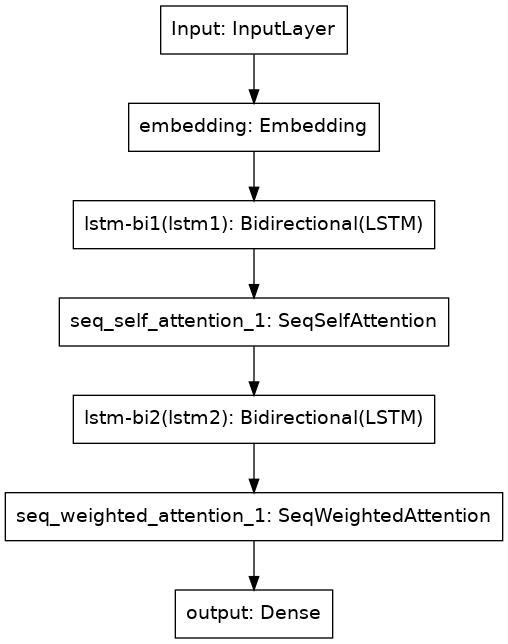

In [109]:
from tensorflow.keras.utils import plot_model

plot_model(model)